In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



In [4]:
# load data
df = pd.read_excel('790/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')
df.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [7]:
df.describe().round(2)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,80658.22,1130.28,456.60,225.79,81508.08,319.33,0.86,0.99,0.69,0.79,2.04,0.70
std,13664.51,109.26,56.24,23.30,13764.09,26.89,0.05,0.00,0.06,0.06,0.32,0.05
min,47939.00,868.48,320.84,152.17,48366.00,247.06,0.49,0.92,0.47,0.55,1.15,0.56
25%,70765.00,1048.83,414.96,211.25,71512.00,300.17,0.83,0.99,0.66,0.75,1.80,0.66
50%,79076.00,1123.67,449.50,224.70,79872.00,317.31,0.86,0.99,0.71,0.80,1.98,0.71
75%,89757.50,1203.34,492.74,240.67,90797.75,338.06,0.90,0.99,0.74,0.83,2.26,0.74
max,136574.00,1559.45,661.91,305.82,138384.00,417.00,0.95,0.99,0.83,0.94,3.14,0.90


In [9]:
# missing value

df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

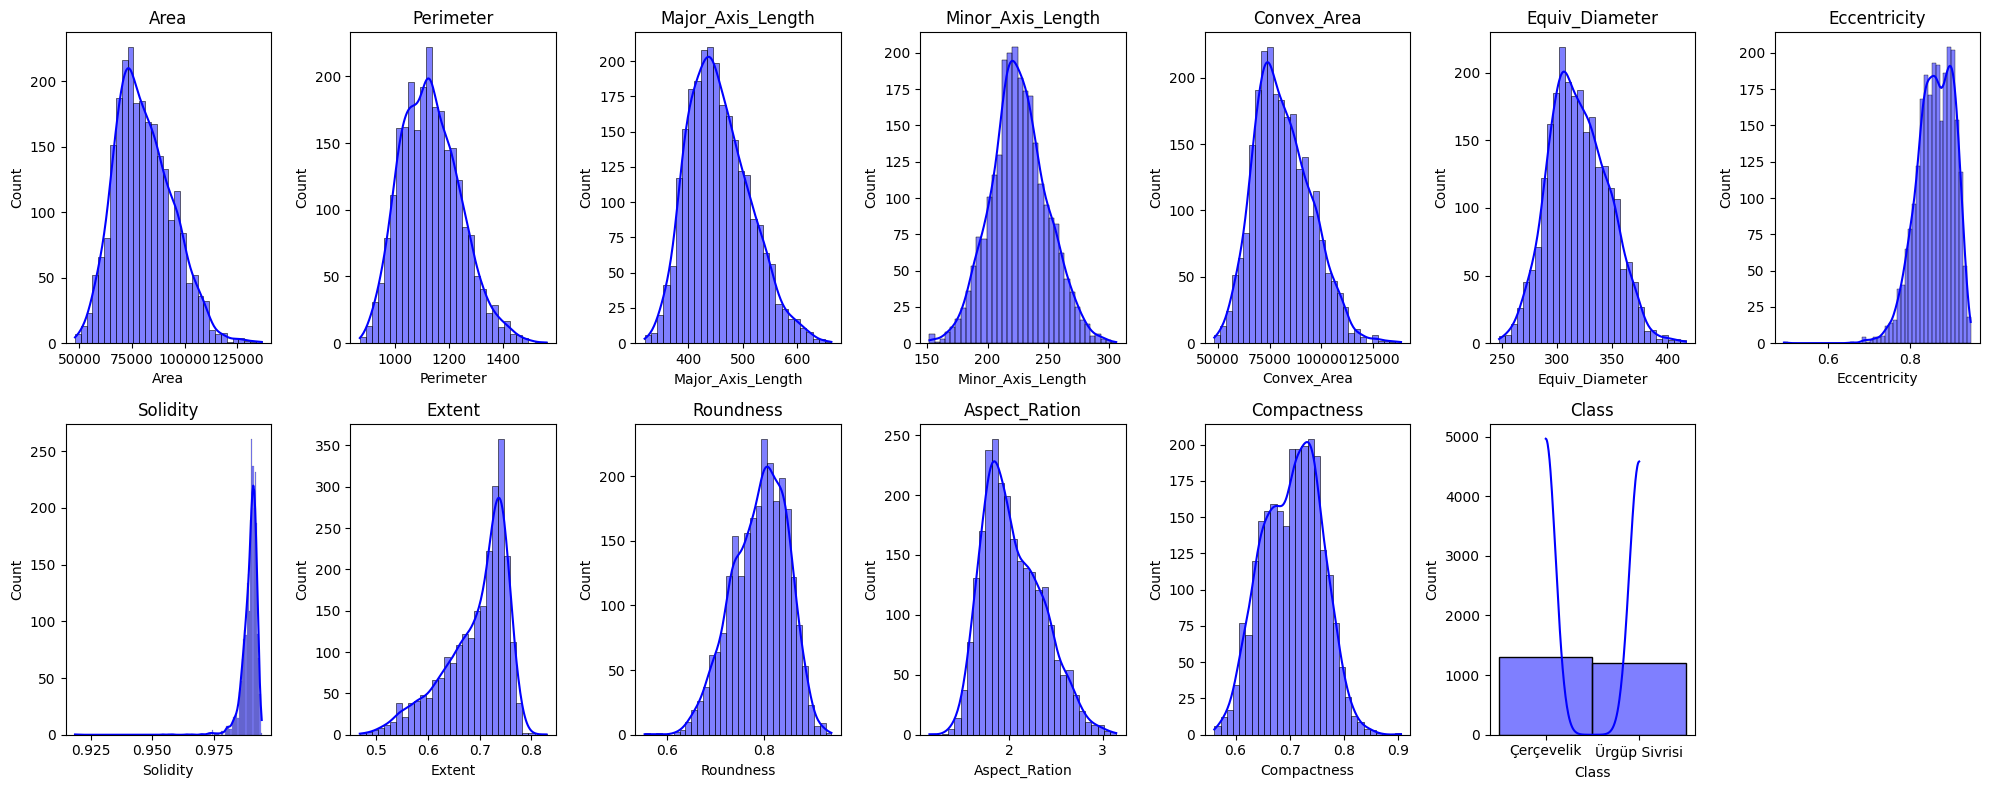

In [44]:
# plot distributions
fig, axs = plt.subplots(2, 7, figsize=(20, 8))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, color="blue", ax=axs[i])
    axs[i].set_title(col)
    
for j in range(len(df.columns), len(axs)):
    axs[j].set_visible(False)
    
plt.tight_layout()
#fig = plt.gcf()
fig.savefig('790/pumpkin_distributions.png', dpi=300)

plt.show()

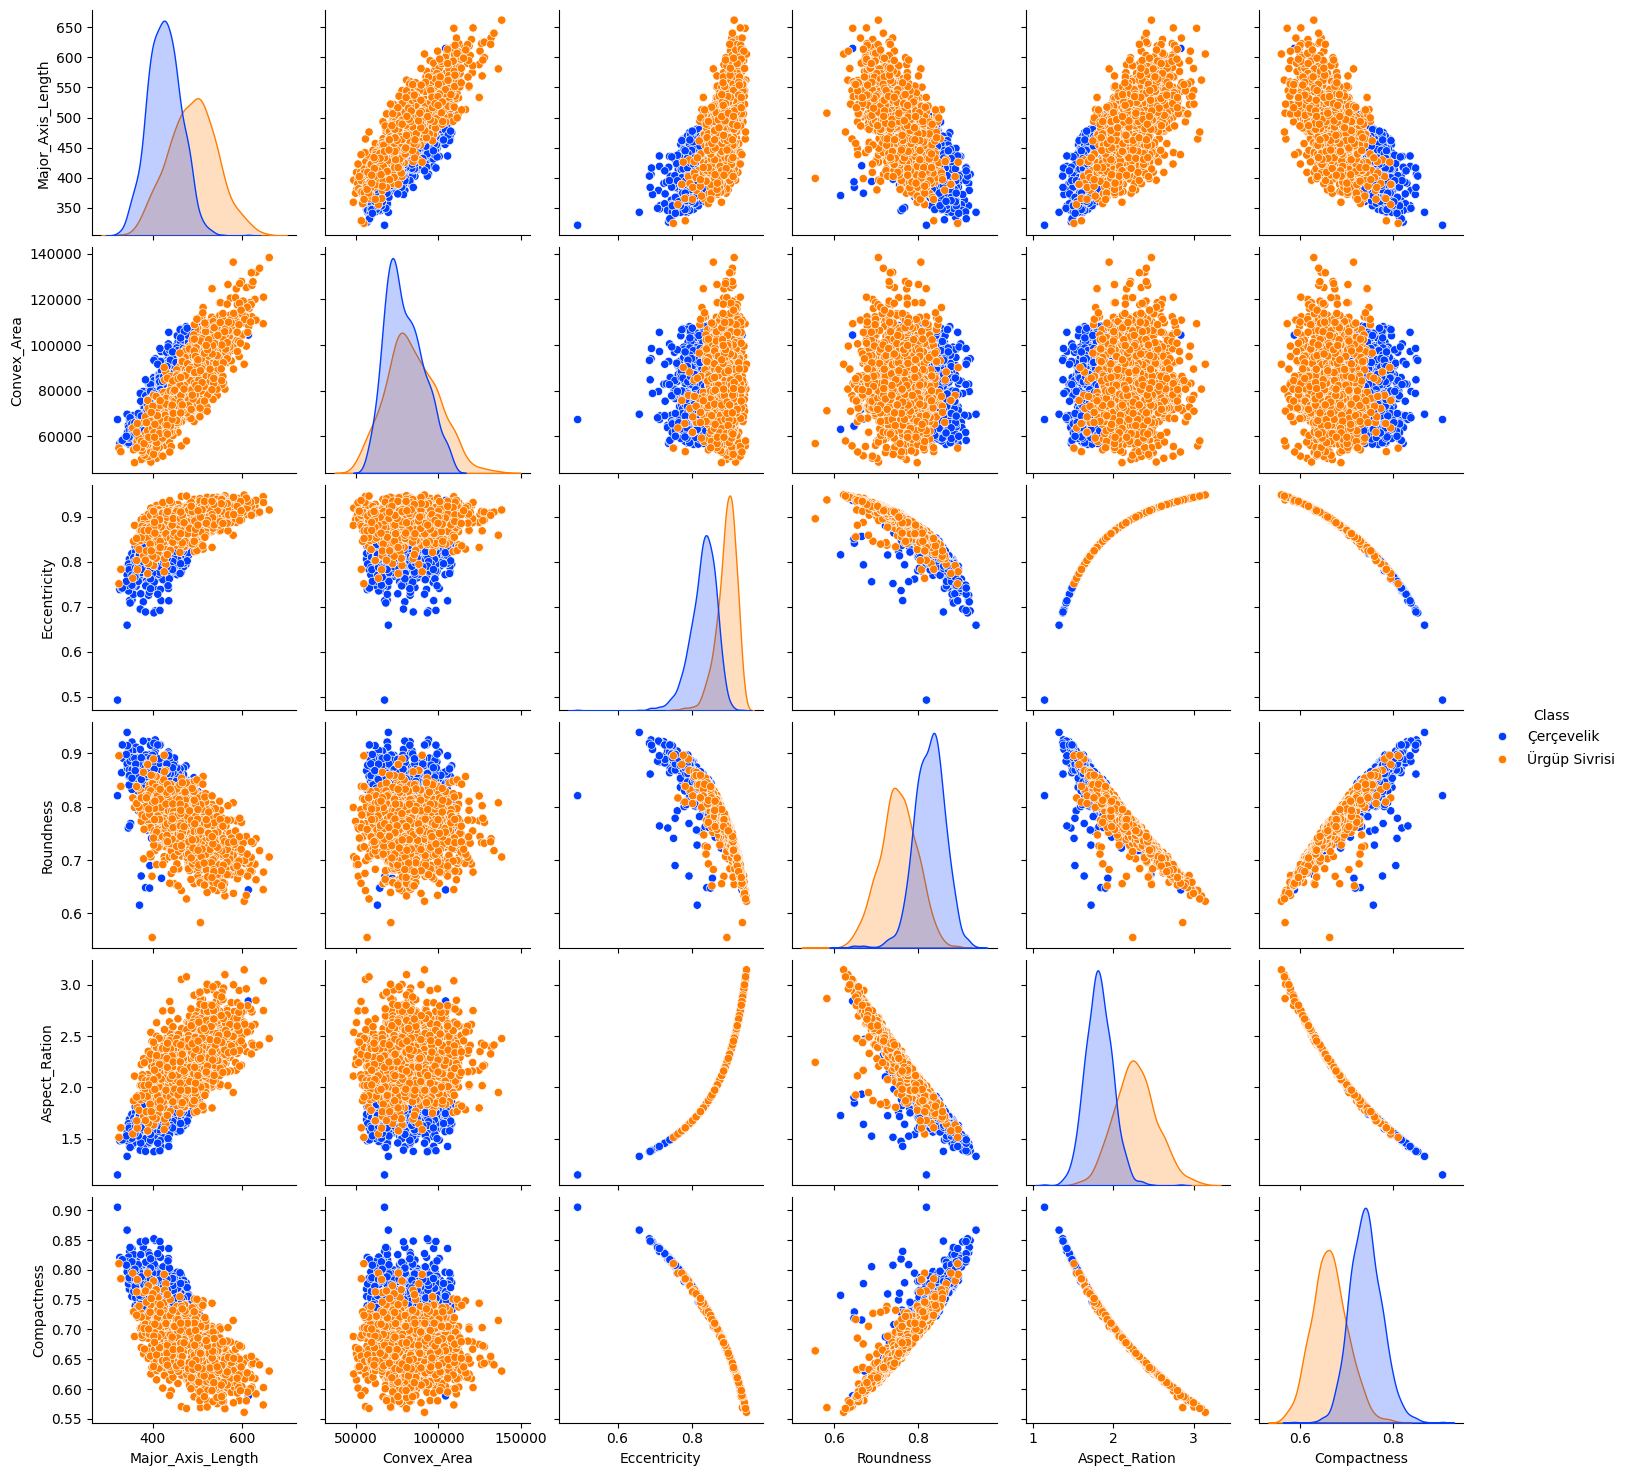

In [46]:
# pair plot on highly correlated variables
subset = [
    "Major_Axis_Length", 
    "Convex_Area", 
    "Eccentricity", 
    "Roundness", 
    "Aspect_Ration", 
    "Compactness", 
    "Class"  
]
sns.pairplot(df[subset], hue="Class", diag_kind="kde",palette="bright")
fig = plt.gcf()
fig.savefig('790/pumpkin_pairplot.png', dpi=300)
plt.show()

In [27]:
# support vector machiane
df["Class"] = df["Class"].astype("category")

# stratify split the train/test dataset
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [33]:
# scale the train/test sepatrately
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
# linear kernel

param_grid_linear = [
    {
    'C': [0.1,1,10,100],
    'kernel':['linear']
    }    
]

svc = SVC()

grid_search_linear = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_linear,
    scoring='accuracy',  
    cv=10          
)

# train on the scaled training set
grid_search_linear.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search_linear.best_params_)
print("Best CV Accuracy:", grid_search_linear.best_score_)




Best Parameters: {'C': 100, 'kernel': 'linear'}
Best CV Accuracy: 0.8875


In [41]:
# prdiction (linear kernel)
best_svc_linear = grid_search_linear.best_estimator_


y_pred_lin = best_svc_linear.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_lin))
print("Classification Report:\n", classification_report(y_test, y_pred_lin))


Test Accuracy: 0.876
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.86      0.92      0.88       260
Ürgüp Sivrisi       0.90      0.83      0.87       240

     accuracy                           0.88       500
    macro avg       0.88      0.87      0.88       500
 weighted avg       0.88      0.88      0.88       500



In [42]:
# radial kernel

param_grid_rbf = [
    # RBF (radial) kernel
    {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['rbf']
    }
]

grid_search_rbf = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_rbf,
    scoring='accuracy',  
    cv=10          
)

# train on the scaled training set
grid_search_rbf.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search_rbf.best_params_)
print("Best CV Accuracy:", grid_search_rbf.best_score_)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.8905


In [43]:
# prdiction (linear kernel)
best_svc_rbf = grid_search_rbf.best_estimator_


y_pred_rbf = best_svc_rbf.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

Test Accuracy: 0.876
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.86      0.92      0.88       260
Ürgüp Sivrisi       0.90      0.83      0.87       240

     accuracy                           0.88       500
    macro avg       0.88      0.87      0.88       500
 weighted avg       0.88      0.88      0.88       500

